In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,balanced_accuracy_score,precision_score

import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("task_3_training_e8da4715deef7d56_f8b7378_generic.csv")
data_filtered = data[[c for c in data.columns if 'gemmes' not in c ]]
data_filtered = data_filtered[[c for c in data_filtered.columns if 'gems' not in c ]]
correlation = data.corr()
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_bottom_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

def get_all_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr
ordered_corr = get_all_abs_correlations(correlation)

def get_all_abs_correlations_desc(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr
ordered_corr_desc = get_all_abs_correlations_desc(correlation)
features_to_exclude = ['midlevel_features_tonal_stability','midlevel_features_dissonance','essentia_strong_peak_stdev','librosa_chroma_pct_10_3','librosa_chroma_pct_50_0','librosa_chroma_pct_50_1','librosa_chroma_pct_50_2','librosa_chroma_pct_50_3','librosa_chroma_pct_50_4','librosa_chroma_pct_50_5','librosa_chroma_pct_50_6','librosa_chroma_pct_50_7','librosa_chroma_pct_50_8','librosa_chroma_pct_50_9','librosa_chroma_pct_50_10','librosa_chroma_pct_50_11','mirtoolbox_hcdf_pct_50','mirtoolbox_novelty_pct_50','mirtoolbox_novelty_std','mirtoolbox_novelty_pct_90','mirtoolbox_roughness_pct_10','mirtoolbox_roughness_pct_50','mirtoolbox_roughness_pct_90','mirtoolbox_dynamics_mean','mirtoolbox_dynamics_pct_10','mirtoolbox_dynamics_pct_50','mirtoolbox_dynamics_pct_90','librosa_mfcc_std_1','librosa_mfcc_std_7','librosa_mfcc_std_8','librosa_mfcc_std_9','librosa_mfcc_std_10','librosa_mfcc_std_11','librosa_mfcc_pct_50_8','librosa_mfcc_pct_50_9','librosa_mfcc_pct_50_10','librosa_mfcc_pct_50_11','librosa_mfcc_pct_50_6','librosa_mfcc_pct_50_7','librosa_mfcc_pct_50_1','librosa_mfcc_pct_90_3','librosa_mfcc_pct_90_4','librosa_mfcc_pct_90_5','librosa_mfcc_pct_10_8','librosa_mfcc_pct_10_6','librosa_mfcc_pct_50_5','librosa_mfcc_pct_10_5','librosa_mfcc_pct_50_4','librosa_mfcc_pct_10_4','librosa_mfcc_pct_10_3','librosa_mfcc_pct_50_3','librosa_mfcc_pct_10_1','librosa_mfcc_pct_10_2','librosa_mfcc_pct_50_2','librosa_mfcc_pct_90_2','librosa_mfcc_pct_10_0','librosa_mfcc_pct_50_0','librosa_mfcc_pct_90_0','librosa_mfcc_mean_0','librosa_mfcc_mean_2']

data_filtered = data_filtered.loc[:, ~data_filtered.columns.isin(data_filtered.filter(features_to_exclude))]
data_targets = data_filtered.loc[:, data_filtered.columns.isin(data_filtered.filter(['arousal', 'valence', 'quadrant']))]
X = data_filtered.loc[:, ~data_filtered.columns.isin(data_filtered.filter(['arousal', 'valence', 'quadrant']))]
feature_names = list(X.columns)
y = data_targets['quadrant'].to_numpy()
y = y.ravel()
y
target = (list(data_targets['quadrant'].unique()))
for i in range(len(target)):
    target[i]=str(target[i])
print(target)
X = X.to_numpy()


['3.0', '1.0', '2.0', '4.0']


>1, train: 0.396, test: 0.388
>2, train: 0.463, test: 0.443
>3, train: 0.485, test: 0.476
>4, train: 0.507, test: 0.469
>5, train: 0.566, test: 0.518
>6, train: 0.642, test: 0.539
>7, train: 0.706, test: 0.564
>8, train: 0.756, test: 0.586
>9, train: 0.796, test: 0.581
>10, train: 0.815, test: 0.575
>11, train: 0.824, test: 0.583
>12, train: 0.826, test: 0.592
>13, train: 0.832, test: 0.592
>14, train: 0.832, test: 0.592
>15, train: 0.832, test: 0.592
>16, train: 0.832, test: 0.592
>17, train: 0.832, test: 0.592
>18, train: 0.832, test: 0.592
>19, train: 0.832, test: 0.592
>20, train: 0.832, test: 0.592


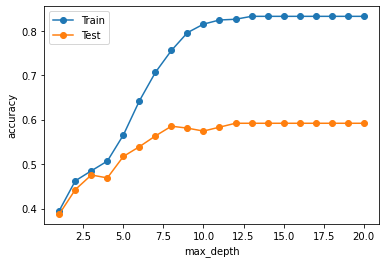

In [2]:
from matplotlib import pyplot
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2)
for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
values = [i for i in range(1, 21)]
train_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i,criterion="entropy", random_state=42, min_samples_leaf=8)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
plt.ylabel('accuracy')
plt.xlabel('max_depth')
pyplot.legend()
pyplot.show()

>1, train: 0.395, test: 0.390
>2, train: 0.462, test: 0.439
>3, train: 0.483, test: 0.478
>4, train: 0.499, test: 0.447
>5, train: 0.570, test: 0.474
>6, train: 0.620, test: 0.548
>7, train: 0.682, test: 0.553
>8, train: 0.726, test: 0.579
>9, train: 0.766, test: 0.579
>10, train: 0.795, test: 0.566
>11, train: 0.821, test: 0.579
>12, train: 0.824, test: 0.592
>13, train: 0.833, test: 0.601
>14, train: 0.835, test: 0.601
>15, train: 0.835, test: 0.592
>16, train: 0.835, test: 0.592
>17, train: 0.835, test: 0.592
>18, train: 0.835, test: 0.592
>19, train: 0.835, test: 0.592
>20, train: 0.835, test: 0.592


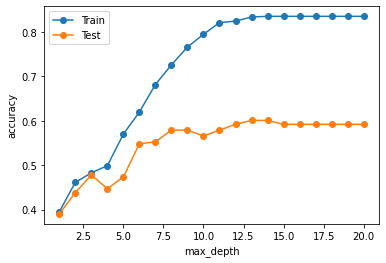

In [3]:
from matplotlib import pyplot
kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2)
for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
values = [i for i in range(1, 21)]
train_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i,criterion="entropy", random_state=42, min_samples_leaf=8)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
plt.ylabel('accuracy')
plt.xlabel('max_depth')
pyplot.legend()
pyplot.show()

>1, train: 0.397, test: 0.362
>2, train: 0.463, test: 0.408
>3, train: 0.484, test: 0.461
>4, train: 0.498, test: 0.434
>5, train: 0.567, test: 0.467
>6, train: 0.614, test: 0.539
>7, train: 0.663, test: 0.526
>8, train: 0.713, test: 0.579
>9, train: 0.759, test: 0.592
>10, train: 0.783, test: 0.572
>11, train: 0.809, test: 0.599
>12, train: 0.822, test: 0.592
>13, train: 0.836, test: 0.599
>14, train: 0.837, test: 0.612
>15, train: 0.837, test: 0.572
>16, train: 0.837, test: 0.572
>17, train: 0.837, test: 0.572
>18, train: 0.837, test: 0.572
>19, train: 0.837, test: 0.572
>20, train: 0.837, test: 0.572


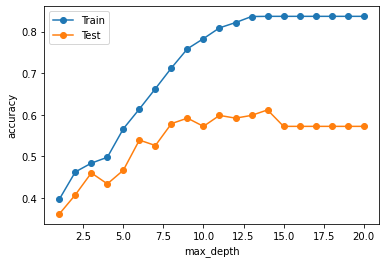

In [4]:
from matplotlib import pyplot
kf = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 2)
for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
values = [i for i in range(1, 21)]
train_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i,criterion="entropy", random_state=42, min_samples_leaf=8)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
plt.ylabel('accuracy')
plt.xlabel('max_depth')
pyplot.legend()
pyplot.show()

In [8]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
from sklearn.ensemble import RandomForestClassifier

In [9]:
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print("\n The best estimator across ALL searched params:\n",CV_rfc.best_estimator_)

KeyboardInterrupt: 

>1, train: 0.415, test: 0.401
>2, train: 0.480, test: 0.441
>3, train: 0.522, test: 0.467
>4, train: 0.579, test: 0.507
>5, train: 0.663, test: 0.526
>6, train: 0.774, test: 0.572
>7, train: 0.879, test: 0.572
>8, train: 0.955, test: 0.553
>9, train: 0.992, test: 0.592
>10, train: 0.999, test: 0.566
>11, train: 1.000, test: 0.572
>12, train: 1.000, test: 0.599
>13, train: 1.000, test: 0.559
>14, train: 1.000, test: 0.553
>15, train: 1.000, test: 0.599
>16, train: 1.000, test: 0.566
>17, train: 1.000, test: 0.559
>18, train: 1.000, test: 0.533
>19, train: 1.000, test: 0.539
>20, train: 1.000, test: 0.546


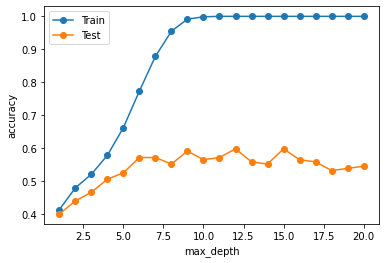

In [12]:
from matplotlib import pyplot
kf = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 2)
for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
values = [i for i in range(1,21)]
train_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(max_depth=i,criterion="entropy", random_state=42)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
plt.ylabel('accuracy')
plt.xlabel('max_depth')
pyplot.legend()
pyplot.show()

>1, train: 0.603, test: 0.638
>2, train: 0.537, test: 0.592
>3, train: 0.516, test: 0.539
>4, train: 0.502, test: 0.566
>5, train: 0.433, test: 0.533
>6, train: 0.386, test: 0.461
>7, train: 0.337, test: 0.474
>8, train: 0.287, test: 0.421
>9, train: 0.241, test: 0.408
>10, train: 0.217, test: 0.428
>11, train: 0.191, test: 0.401
>12, train: 0.178, test: 0.408
>13, train: 0.164, test: 0.401
>14, train: 0.163, test: 0.388
>15, train: 0.163, test: 0.428
>16, train: 0.163, test: 0.428
>17, train: 0.163, test: 0.428
>18, train: 0.163, test: 0.428
>19, train: 0.163, test: 0.428
>20, train: 0.163, test: 0.428


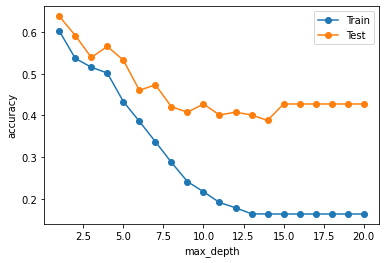

In [14]:
from matplotlib import pyplot
from sklearn.metrics import hamming_loss
kf = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 2)
for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
values = [i for i in range(1, 21)]
train_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i,criterion="entropy", random_state=42, min_samples_leaf=8)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = hamming_loss(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = hamming_loss(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
plt.ylabel('accuracy')
plt.xlabel('max_depth')
pyplot.legend()
pyplot.show()

>1, train: 0.430, test: 0.439
>2, train: 0.474, test: 0.461
>3, train: 0.491, test: 0.478
>4, train: 0.513, test: 0.509
>5, train: 0.557, test: 0.548
>6, train: 0.566, test: 0.583
>7, train: 0.579, test: 0.575
>8, train: 0.566, test: 0.570
>9, train: 0.570, test: 0.579
>10, train: 0.588, test: 0.610
>11, train: 0.570, test: 0.596
>12, train: 0.570, test: 0.570
>13, train: 0.561, test: 0.592
>14, train: 0.610, test: 0.623
>15, train: 0.588, test: 0.605
>16, train: 0.596, test: 0.592
>17, train: 0.610, test: 0.605
>18, train: 0.588, test: 0.570
>19, train: 0.592, test: 0.601
>20, train: 0.579, test: 0.605
>21, train: 0.575, test: 0.623
>22, train: 0.583, test: 0.618
>23, train: 0.588, test: 0.614
>24, train: 0.592, test: 0.614


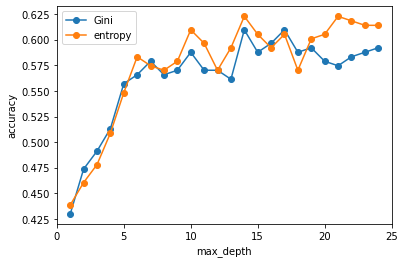

In [31]:
from matplotlib import pyplot
kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2)
for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
values = [i for i in range(1,25)]
gini_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(max_depth=i,criterion="gini", random_state=42)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	gini_yhat = model.predict(X_test)
	gini_acc = accuracy_score(y_test, gini_yhat)
	gini_scores.append(gini_acc)
    
	model = RandomForestClassifier(max_depth=i,criterion="entropy", random_state=42)
	model.fit(X_train, y_train)
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, gini_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, gini_scores, '-o', label='Gini')
pyplot.plot(values, test_scores, '-o', label='entropy')
ax = plt.gca()
ax.set_xlim([0, 25])

plt.ylabel('accuracy')
plt.xlabel('max_depth')
pyplot.legend()
pyplot.savefig("rfcfigure10.jpg")

>1, train: 0.401, test: 0.395
>2, train: 0.441, test: 0.447
>3, train: 0.467, test: 0.487
>4, train: 0.520, test: 0.513
>5, train: 0.507, test: 0.520
>6, train: 0.513, test: 0.507
>7, train: 0.539, test: 0.553
>8, train: 0.546, test: 0.572
>9, train: 0.553, test: 0.539


KeyboardInterrupt: 

>1, train: 0.395, test: 0.401
>2, train: 0.447, test: 0.441
>3, train: 0.487, test: 0.467
>4, train: 0.493, test: 0.507
>5, train: 0.513, test: 0.526
>6, train: 0.539, test: 0.572
>7, train: 0.566, test: 0.572
>8, train: 0.546, test: 0.553
>9, train: 0.546, test: 0.592
>10, train: 0.559, test: 0.566
>11, train: 0.546, test: 0.572
>12, train: 0.546, test: 0.599
>13, train: 0.592, test: 0.559
>14, train: 0.566, test: 0.553
>15, train: 0.579, test: 0.599
>16, train: 0.572, test: 0.566
>17, train: 0.572, test: 0.559
>18, train: 0.546, test: 0.533
>19, train: 0.533, test: 0.539
>20, train: 0.566, test: 0.546
>21, train: 0.566, test: 0.566
>22, train: 0.566, test: 0.553
>23, train: 0.546, test: 0.553
>24, train: 0.553, test: 0.553


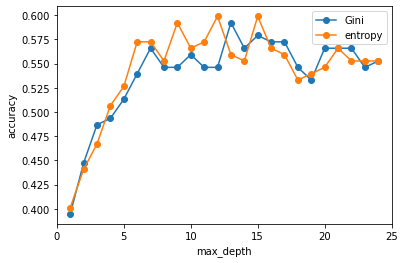

In [32]:
from matplotlib import pyplot
kf = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 2)
for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
values = [i for i in range(1,25)]
gini_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(max_depth=i,criterion="gini", random_state=42)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	gini_yhat = model.predict(X_test)
	gini_acc = accuracy_score(y_test, gini_yhat)
	gini_scores.append(gini_acc)
    
	model = RandomForestClassifier(max_depth=i,criterion="entropy", random_state=42)
	model.fit(X_train, y_train)
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, gini_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, gini_scores, '-o', label='Gini')
pyplot.plot(values, test_scores, '-o', label='entropy')
ax = plt.gca()
ax.set_xlim([0, 25])

plt.ylabel('accuracy')
plt.xlabel('max_depth')
pyplot.legend()
pyplot.savefig("rfcfigure15.jpg")

>1, train: 0.412, test: 0.412
>2, train: 0.445, test: 0.461
>3, train: 0.469, test: 0.480
>4, train: 0.493, test: 0.500
>5, train: 0.509, test: 0.520
>6, train: 0.529, test: 0.531
>7, train: 0.544, test: 0.535
>8, train: 0.535, test: 0.548
>9, train: 0.546, test: 0.537
>10, train: 0.542, test: 0.542
>11, train: 0.542, test: 0.561
>12, train: 0.561, test: 0.553
>13, train: 0.546, test: 0.546
>14, train: 0.546, test: 0.544
>15, train: 0.561, test: 0.564
>16, train: 0.537, test: 0.539
>17, train: 0.555, test: 0.539
>18, train: 0.531, test: 0.542
>19, train: 0.542, test: 0.544
>20, train: 0.533, test: 0.533
>21, train: 0.544, test: 0.537
>22, train: 0.544, test: 0.537
>23, train: 0.544, test: 0.537
>24, train: 0.542, test: 0.537


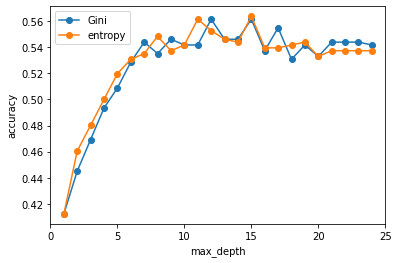

In [34]:
from matplotlib import pyplot
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2)
for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
values = [i for i in range(1,25)]
gini_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(max_depth=i,criterion="gini", random_state=42)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	gini_yhat = model.predict(X_test)
	gini_acc = accuracy_score(y_test, gini_yhat)
	gini_scores.append(gini_acc)
    
	model = RandomForestClassifier(max_depth=i,criterion="entropy", random_state=42)
	model.fit(X_train, y_train)
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, gini_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, gini_scores, '-o', label='Gini')
pyplot.plot(values, test_scores, '-o', label='entropy')
ax = plt.gca()
ax.set_xlim([0, 25])

plt.ylabel('accuracy')
plt.xlabel('max_depth')
pyplot.legend()
pyplot.savefig("rfcfigure5.jpg")

>1, train: 0.382, test: 0.362
>2, train: 0.434, test: 0.408
>3, train: 0.480, test: 0.461
>4, train: 0.487, test: 0.434
>5, train: 0.539, test: 0.467
>6, train: 0.553, test: 0.539
>7, train: 0.500, test: 0.526
>8, train: 0.539, test: 0.579
>9, train: 0.539, test: 0.592
>10, train: 0.553, test: 0.572
>11, train: 0.553, test: 0.599
>12, train: 0.553, test: 0.592
>13, train: 0.553, test: 0.599
>14, train: 0.546, test: 0.612
>15, train: 0.553, test: 0.572
>16, train: 0.553, test: 0.572
>17, train: 0.553, test: 0.572
>18, train: 0.553, test: 0.572
>19, train: 0.553, test: 0.572
>20, train: 0.553, test: 0.572


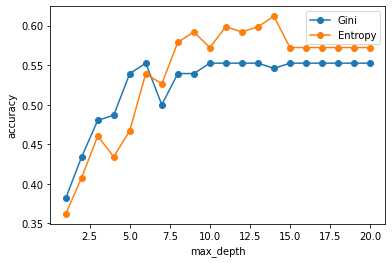

In [33]:
from matplotlib import pyplot
kf = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 2)
for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
values = [i for i in range(1,21)]
gini_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i,criterion="gini", random_state=42, min_samples_leaf=8)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	gini_yhat = model.predict(X_test)
	gini_acc = accuracy_score(y_test, gini_yhat)
	gini_scores.append(gini_acc)
    
	model = DecisionTreeClassifier(max_depth=i,criterion="entropy",random_state=42, min_samples_leaf=8)
	model.fit(X_train, y_train)
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, gini_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, gini_scores, '-o', label='Gini')
pyplot.plot(values, test_scores, '-o', label='Entropy')
plt.ylabel('accuracy')
plt.xlabel('max_depth')
pyplot.legend()
pyplot.show()

In [39]:
from sklearn.metrics import plot_confusion_matrix
kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2)
for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
model = RandomForestClassifier(max_depth=21,criterion="entropy", random_state=42)
	# fit model on the training dataset
model.fit(X_train, y_train)
gini_yhat = model.predict(X_test)
print(accuracy_score(y_test, gini_yhat))

0.6228070175438597


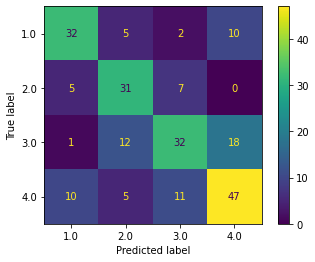

In [40]:
plot_confusion_matrix(model, X_test, y_test)

In [41]:
from matplotlib import pyplot
kf = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 2)
for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
model = DecisionTreeClassifier(max_depth=14,criterion="entropy",random_state=42, min_samples_leaf=8)
model.fit(X_train, y_train)
gini_yhat = model.predict(X_test)
print(accuracy_score(y_test, gini_yhat))

0.6118421052631579


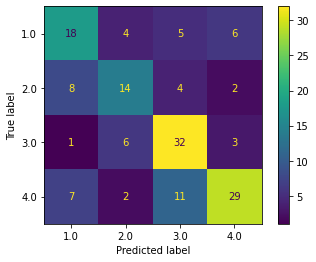

In [42]:
plot_confusion_matrix(model, X_test, y_test)